In [1]:
import pandas as pd

from brainspace.gradient import GradientMaps
# this is computed based on `baseline`
ref_cmat = pd.read_csv('data/cmat/ref_mean.csv').to_numpy()

gref = GradientMaps(random_state=42, approach='pca', kernel='cosine')
# kernel needed for centered mats
gref.fit(ref_cmat)

DIR = '/Users/qasem/PycharmProjects/cortical-400-subcortical-RL-task-rest/'
subjects = pd.read_csv(DIR + '_participants.tsv', sep='\t')
subjects = subjects.loc[subjects.exclude == 0, 'participant_id'].tolist()
subjects.remove(37)  # no data available
subjects.remove(25)  # no data available
subjects.remove(36)  # no data available
# print(subjects)

# take centered connectivity matrices and compute gradients
baseline as reference

for each gradient, take shift that happens from baseline to early, and from early to late. add it to epochs

In [2]:
def cmat_cnt(subject, epoch):
    return pd.read_csv('data/cmat/cnt/cnt_'+str(subject)+'_'+epoch+'.csv').to_numpy()

In [3]:
# make and save gradients

# EPOCHS = ['baseline', 'early', 'late']
# EPOCH_REF = 'baseline'

# g = GradientMaps(random_state=42, approach='pca', alignment='procrustes', kernel='cosine')
# g.fit([cmat_cnt(s, e) for e in  EPOCHS for s in subjects],
#       reference=gref.gradients_)
#
# assert len(subjects) * len(EPOCHS) == len(g.aligned_)


# print(np.stack(g.aligned_).shape)
#
# regions_nets = pd.read_csv('data/regions_sorted.csv')
#
# dfg = []
# for e in EPOCHS:
#     for s in subjects:
#         subj_epoch_dict = {'subject': s, 'epoch': e, 'region': regions_nets['region'],
#                            '7net': regions_nets['7net'], '17net': regions_nets['17net']}
#         for n in range(1,10):     # take top 9 gradients. 10th comes before 2 when sorted as string.
#             subj_epoch_dict['g'+str(n)] = g.aligned_[EPOCHS.index(e) * len(subjects) + subjects.index(s)][:, n-1]
#         dfg.append(pd.DataFrame(subj_epoch_dict))
#
# dfg = pd.concat(dfg, axis=0).reset_index(drop=True)
# dfg.to_csv('data/gradient_10.csv', index=False)

In [4]:
# load gradients, only first 3 columns

dfg = pd.read_csv('data/gradient_10.csv',
                  usecols=['subject', 'region', '7net', '17net', 'epoch',
                           'g1', 'g2', 'g3'])

dfg = dfg.pivot_table(index=['subject', 'region', '7net', '17net'], columns='epoch')

def add_contrasts(df):
    df = df.droplevel(0, axis=1)
    df['b2e'] = df['early'] - df['baseline']
    df['e2l'] = df['late'] - df['early']
    return df

dfg = dfg.groupby(level=0, axis=1).apply(add_contrasts)
dfg.columns.names = ['g', 'epoch']

this contains PC loadings for each subject, region, and epoch (phases of learning; baseline, early, late, and their contrasts)

In [5]:
dfg.head()

g                                                         g1            \
epoch                                                    b2e  baseline   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB -1.073136 -1.202219   
        7Networks_LH_Cont_Cing_2 Cont ContC         0.805691  0.132472   
        7Networks_LH_Cont_Cing_3 Cont ContC         0.915711 -0.087299   
        7Networks_LH_Cont_Cing_4 Cont ContA        -1.690321 -0.275912   
        7Networks_LH_Cont_Cing_5 Cont ContC         0.194787 -1.144249   

g                                                                       \
epoch                                                    e2l     early   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.668598 -2.275355   
        7Networks_LH_Cont_Cing_2 Cont ContC         0.070708  0.938163   
        7Networks_LH_Cont_Cing_3 Cont ContC        -0.275651  0.828413   
        7Networks_LH_Cont_Cing_4 Cont ContA         1.202722 -1.966233   
        7Networks_LH_Cont_Cing_5 Cont ContC         1.652235 -0.949462   

g                                                                   g2  \
epoch                                                   late       b2e   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB -1.606757  0.582656   
        7Networks_LH_Cont_Cing_2 Cont ContC         1.008871  0.607136   
        7Networks_LH_Cont_Cing_3 Cont ContC         0.552762  0.423712   
        7Networks_LH_Cont_Cing_4 Cont ContA        -0.763511 -1.150298   
        7Networks_LH_Cont_Cing_5 Cont ContC         0.702773 -1.113543   

g                                                                       \
epoch                                               baseline       e2l   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB -0.087578 -1.385043   
        7Networks_LH_Cont_Cing_2 Cont ContC        -2.357872  0.519335   
        7Networks_LH_Cont_Cing_3 Cont ContC        -2.294425  0.156920   
        7Networks_LH_Cont_Cing_4 Cont ContA         0.491095  1.235301   
        7Networks_LH_Cont_Cing_5 Cont ContC        -0.551032 -0.251611   

g                                                                       \
epoch                                                  early      late   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.495079 -0.889964   
        7Networks_LH_Cont_Cing_2 Cont ContC        -1.750736 -1.231401   
        7Networks_LH_Cont_Cing_3 Cont ContC        -1.870713 -1.713793   
        7Networks_LH_Cont_Cing_4 Cont ContA        -0.659202  0.576098   
        7Networks_LH_Cont_Cing_5 Cont ContC        -1.664575 -1.916185   

g                                                         g3            \
epoch                                                    b2e  baseline   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.097862 -0.634879   
        7Networks_LH_Cont_Cing_2 Cont ContC        -1.395094 -0.347894   
        7Networks_LH_Cont_Cing_3 Cont ContC        -1.295050 -0.423588   
        7Networks_LH_Cont_Cing_4 Cont ContA         0.549417 -0.621618   
        7Networks_LH_Cont_Cing_5 Cont ContC         0.569075 -1.031160   

g                                                                       \
epoch                                                    e2l     early   
subject region                   7net 17net                              
1       7Networks_LH_Cont_Cing_1 Cont SalVentAttnB  0.016636 -0.537017   
        7Networks_LH_Cont_Cing_2 Cont ContC         1.944512 -1.742987   
        7Networks_LH_Cont_Cing_3 Cont ContC         2.777589 -1.718638  

In [6]:
print(dfg.index.names, dfg.columns.names)

['subject', 'region', '7net', '17net'] ['g', 'epoch']


the following seems to be noise. look at the difference between mean and std for each gradient.

In [7]:
import seaborn
import matplotlib.pyplot as plt

seaborn.set_theme(style='whitegrid')
seaborn.set_style('white')
seaborn.set_context('paper', font_scale=1.5)

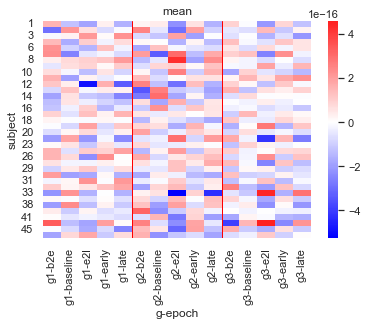

In [8]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.heatmap(dfg.groupby('subject').mean(),
                cmap='bwr', center=0)
ax.set_title("mean")
for i in range(1, 10):  ax.axvline(i * 5, color='red', linewidth=1)

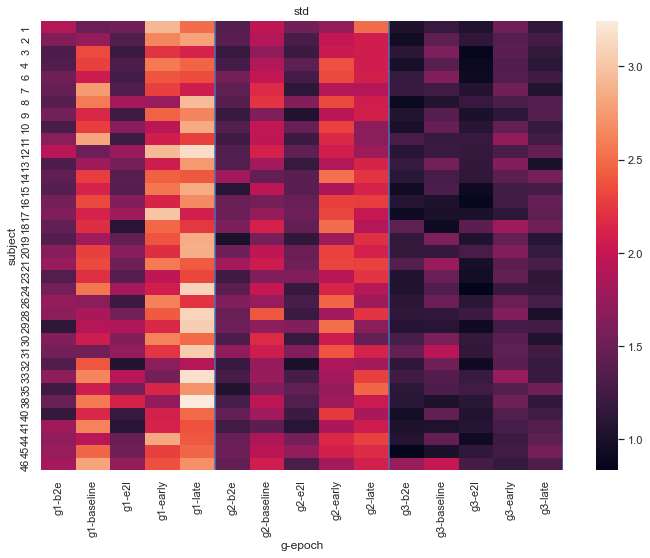

In [9]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
ax = seaborn.heatmap(dfg.groupby('subject').std())
ax.set_title('std')
for i in range(1, 10):  ax.axvline(i * 5)

# any correlation with behavioral task scores?
just to clarify, we had 2 task scores for each subject:
RLScore is the score with fPCA (described in methods), and tscore is the score is simply an unpaired t-test between the late and early learning phases, ie how much they improved throughout learning.

In [10]:
# load learning scores
metrics = pd.read_csv('data/metrics.csv', index_col=3)
metrics

,Subject,tscore,RLScore
subject,,,
1,AB1,-8.686500,-1.179789
2,AG1,-6.485268,1.104018
3,AH1,-2.347640,-0.302101
4,AM1,-6.676496,-1.400917
6,AP1,-16.480796,0.868475
7,AV1,-3.902501,0.859943
8,BN1,-6.263557,1.433999
9,CD1,-10.370127,-0.661215
10,CG1,-4.442353,-0.337563


In [11]:
print(metrics.corrwith(metrics['RLScore']))

tscore     0.261855
RLScore    1.000000
dtype: float64


In [12]:
from scipy.stats import pearsonr
def pval(x, y): return pearsonr(x, y)[1]

take mean, median, and std of each gradient/epoch, and see if there is any significance with task scores.

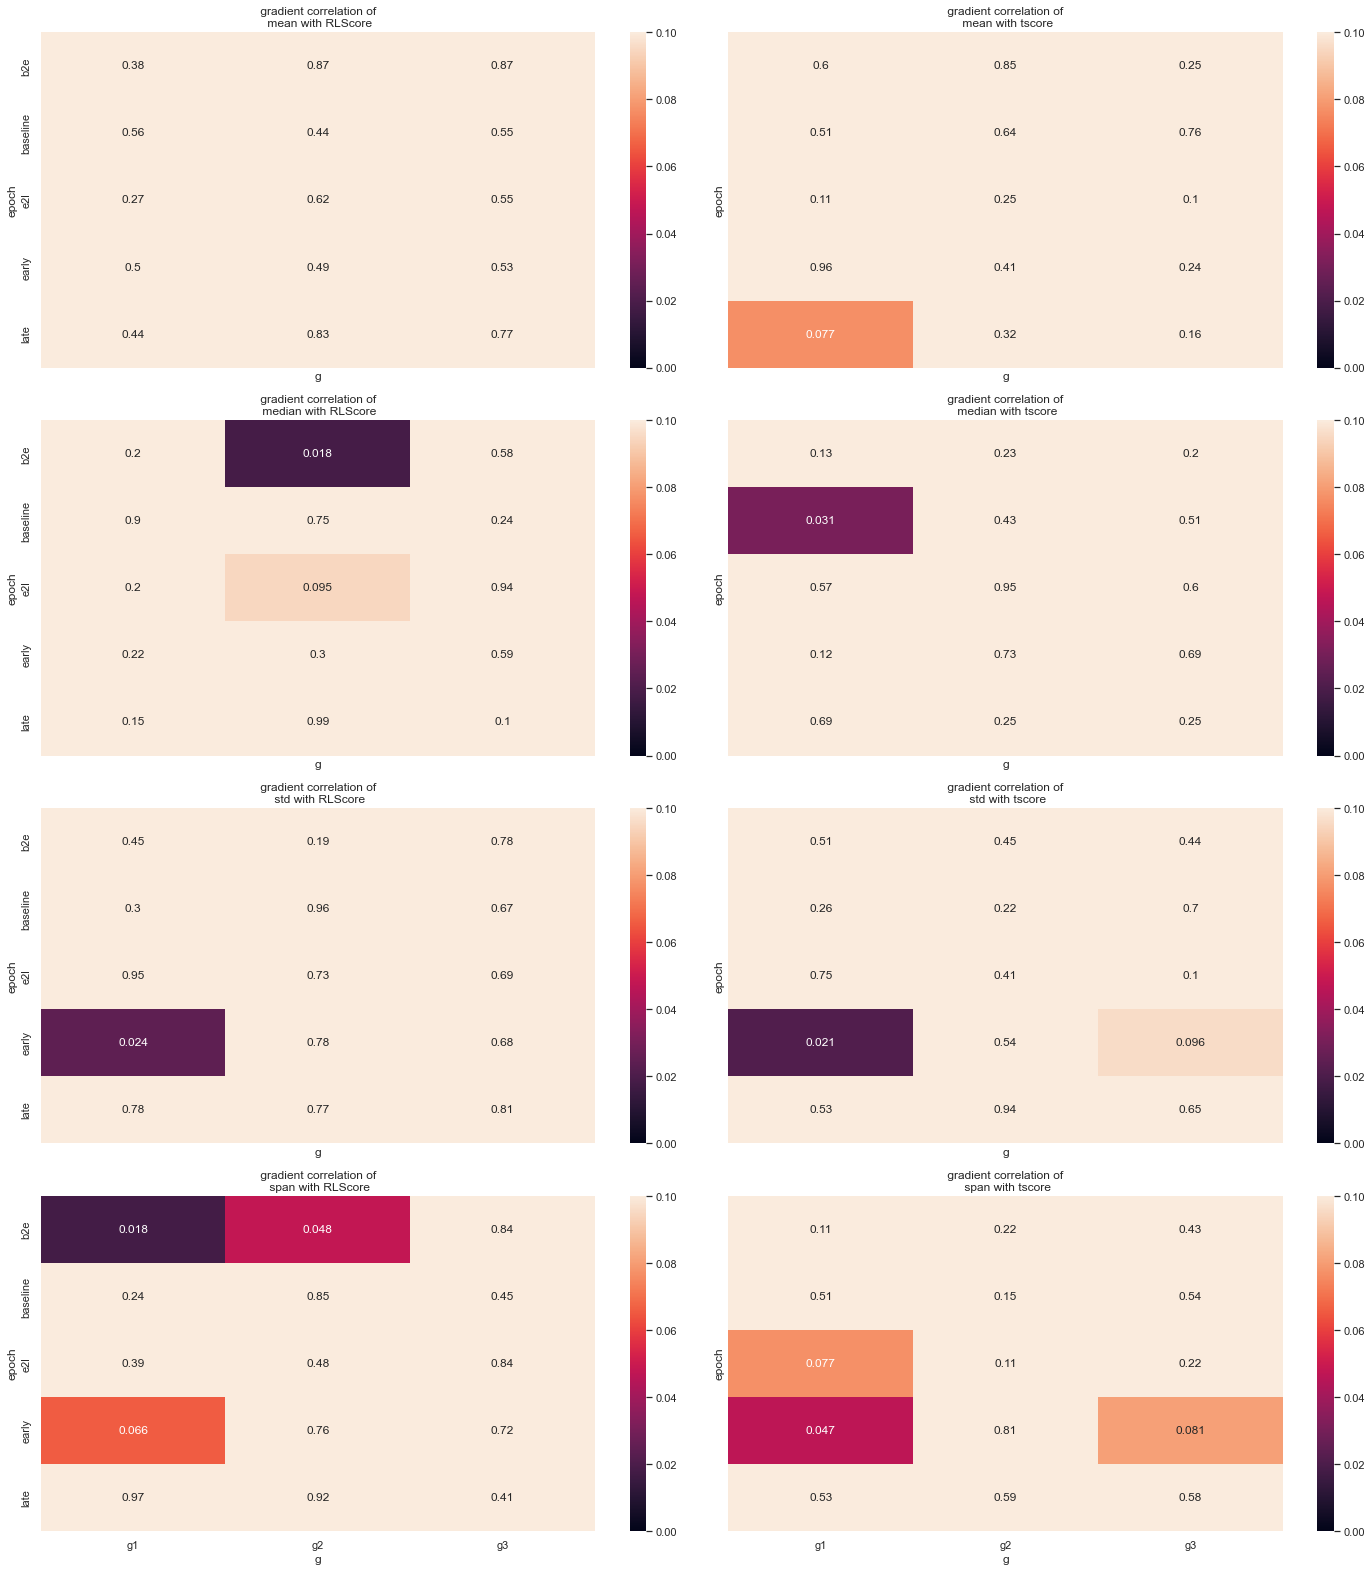

In [13]:
span = lambda x: x.max() - x.min()

fig, axes = plt.subplots(4,2, figsize=(20, 22), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    agg_func = 'mean' if i < 2 else 'median' if i < 4 else 'std' if i < 6 else span
    agg_str = agg_func if agg_func != span else 'span'
    metric = 'RLScore' if i%2 == 0 else 'tscore'

    pval_score = dfg.groupby(level='subject').apply(agg_func).corrwith(metrics[metric], method=pval)
    seaborn.heatmap(pval_score.unstack('g'), annot=True, vmin=0, vmax=.1, ax=ax)
    ax.set_title(f' gradient correlation of \n {agg_str} with {metric}')

plt.tight_layout()
# plt.savefig('g-pvalue.png')
plt.show()

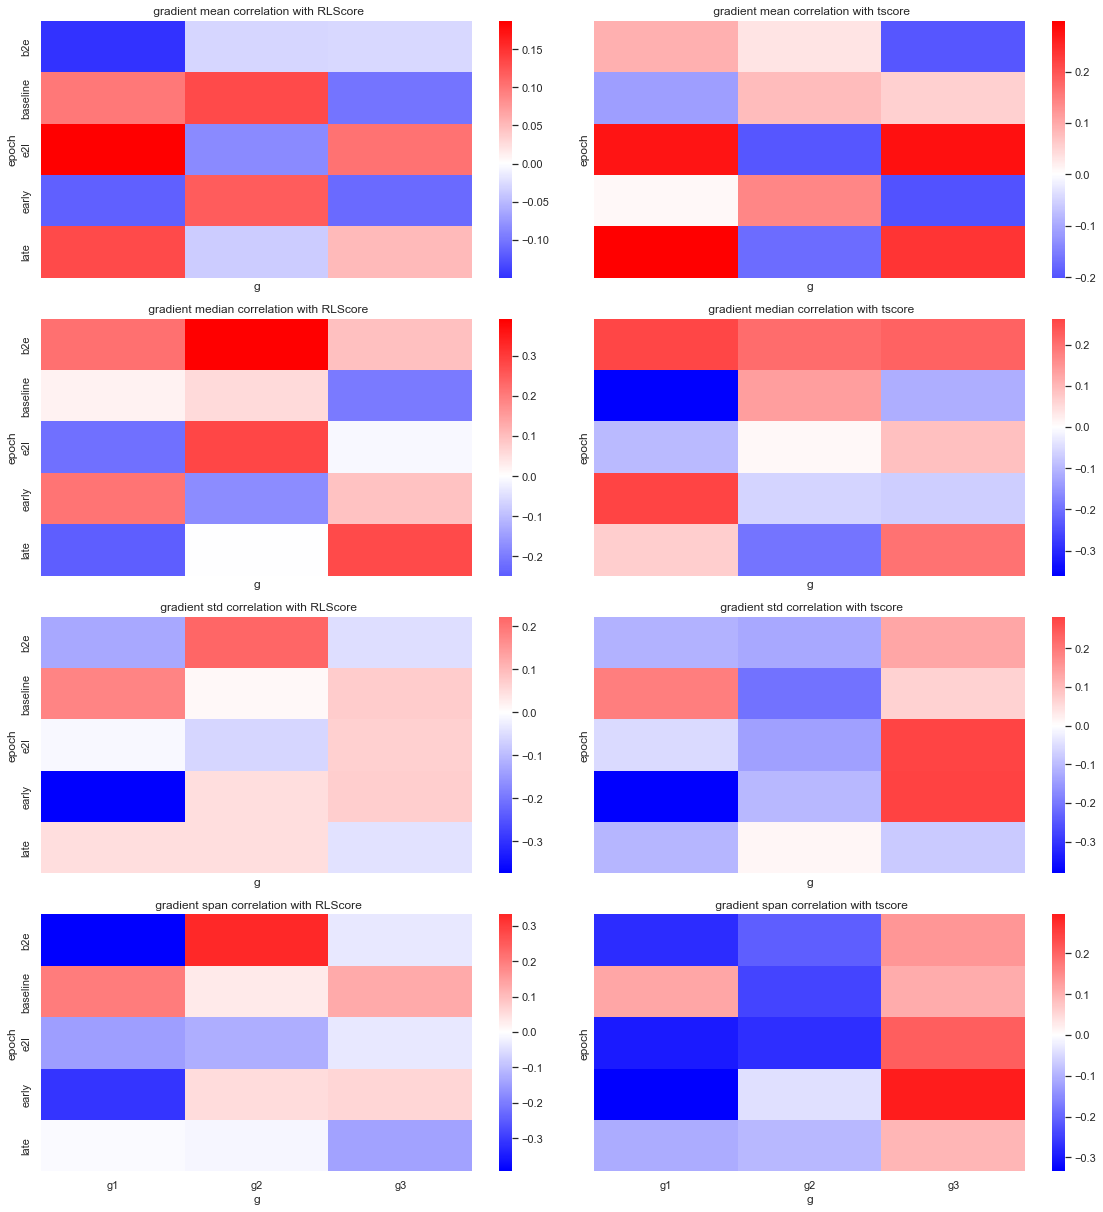

In [14]:
fig, axes = plt.subplots(4,2, figsize=(16, 17), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    agg_func = 'mean' if i < 2 else 'median' if i < 4 else 'std' if i < 6 else span
    agg_str = agg_func if agg_func != span else 'span'
    metric = 'RLScore' if i%2 == 0 else 'tscore'

    corr_score = dfg.groupby(level='subject').apply(agg_func).corrwith(metrics[metric])
    seaborn.heatmap(corr_score.unstack('g'), ax=ax, cmap='bwr', center=0)
    ax.set_title(f' gradient {agg_str} correlation with {metric}')

plt.tight_layout()
plt.show()
# fig.savefig('g-corr.png', dpi=300)

# static 3D plot in top 3 gradients and color with task score
none significant as shown above.

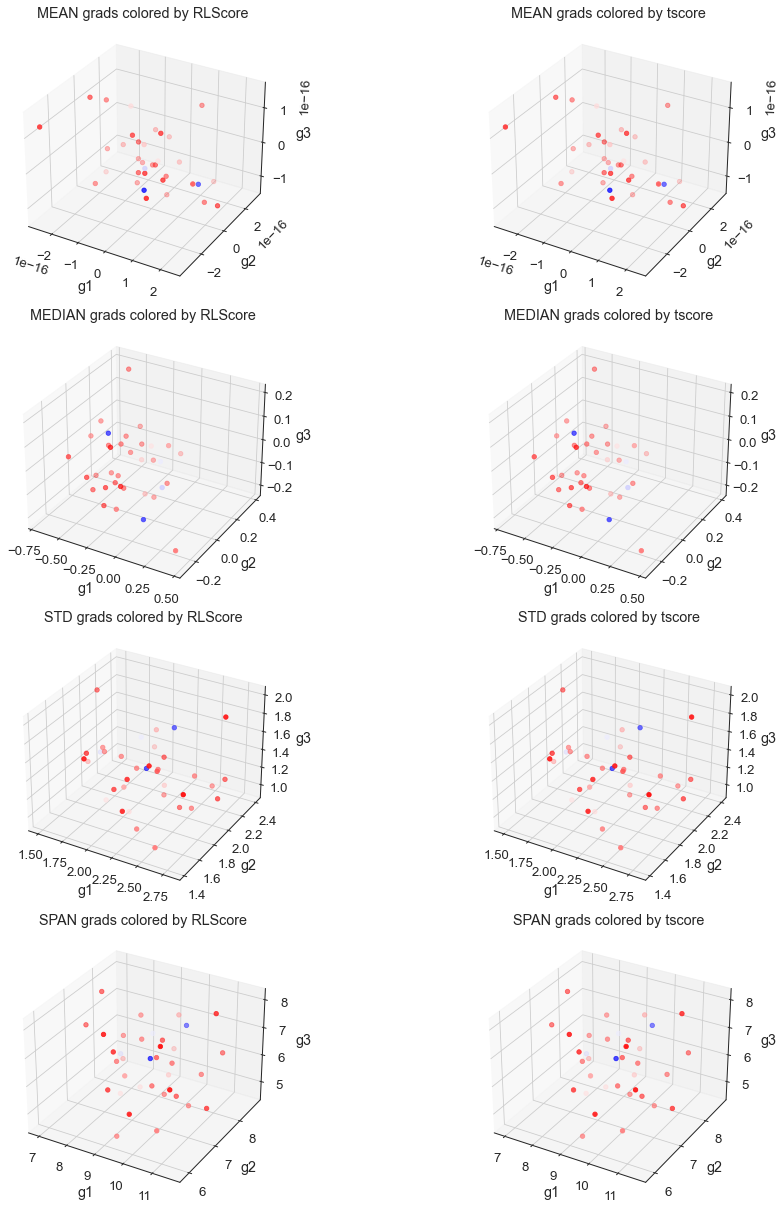

In [15]:
epoch = 'baseline'

seaborn.set_theme(style='whitegrid')
seaborn.set_style('white')
seaborn.set_context('paper', font_scale=1.5)

fig, axes = plt.subplots(4,2, figsize=(16, 17), subplot_kw={'projection': '3d'})

for i, ax in enumerate(axes.flatten()):
    agg_func = 'mean' if i < 2 else 'median' if i < 4 else 'std' if i < 6 else span
    agg_str = agg_func if agg_func != span else 'span'
    metric = 'RLScore' if i%2 == 0 else 'tscore'

    data = dfg.groupby(level='subject').apply(agg_func).xs(epoch, axis=1, level='epoch').join(metrics)

    ax.scatter(data['g1'], data['g2'], data['g3'], c=data['tscore'], cmap='bwr')
    ax.set_xlabel('g1')
    ax.set_ylabel('g2')
    ax.set_zlabel('g3')

    ax.set_title(agg_str.upper() + ' grads colored by ' + metric)

plt.tight_layout()
plt.show()

# multiple regression and get weights for each gradient

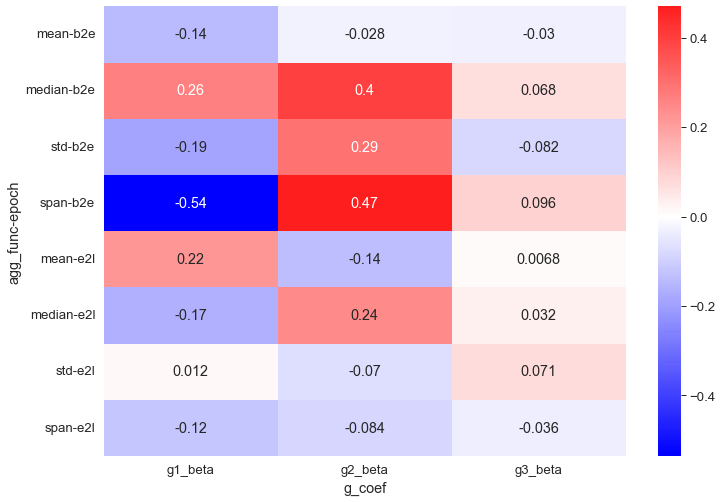

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

metric = 'RLScore'

def mult_coefs(df):
    mult_reg_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    mult_reg_model.fit(df[['g1', 'g2', 'g3']], df[metric])
    mult_reg_model = mult_reg_model.named_steps['linearregression']
    return pd.DataFrame(mult_reg_model.coef_, index=['g1_beta', 'g2_beta', 'g3_beta'], columns=['beta'])


aggregations = ['mean', 'median', 'std', span]
aggregations_str = ['mean', 'median', 'std', 'span']

data = dfg.reorder_levels([1,0],axis=1).loc[:, pd.IndexSlice[['b2e', 'e2l']]]

data_agg = []
for agg_func in aggregations:
    data_agg.append(
        data.groupby(level='subject').apply(agg_func).stack('epoch').join(metrics)
    )
data_agg = pd.concat(data_agg, axis=0, keys=aggregations_str, names=['agg_func'])

data_coefs = data_agg.groupby(level=['epoch', 'agg_func']).apply(mult_coefs)
data_coefs.index.names = ['epoch', 'agg_func', 'g_coef']
data_coefs = data_coefs.unstack('g_coef').reorder_levels([1,0], axis=0)

seaborn.heatmap(data_coefs['beta'], annot=True, cmap='bwr', center=0)
# plt.savefig('g-coefs.svg')
plt.show()

## ols regression

In [17]:
data = dfg.groupby(level='subject').apply('median').xs('baseline', axis=1, level='epoch').join(metrics)

from statsmodels.formula.api import ols
model = ols('RLScore ~ g1 + g2 + g3', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RLScore   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.5486
Date:                Tue, 04 Apr 2023   Prob (F-statistic):              0.653
Time:                        15:19:29   Log-Likelihood:                -49.672
No. Observations:                  36   AIC:                             107.3
Df Residuals:                      32   BIC:                             113.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1323      0.289     -0.457      0.651      -0.722       0.457
g1             0.0294      0.743      0.040      0.969      -1.484       1.542
g2             0.6057      1.161      0.522      0.606      -1.760       2.971
g3            -2.2069      1.808     -1.220      0.231      -5.890       1.477
==============================================================================
Omnibus:                        3.329   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.189   Jarque-Bera (JB):                1.517
Skew:                          -0.004   Prob(JB):                        0.468
Kurtosis:                       1.994   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

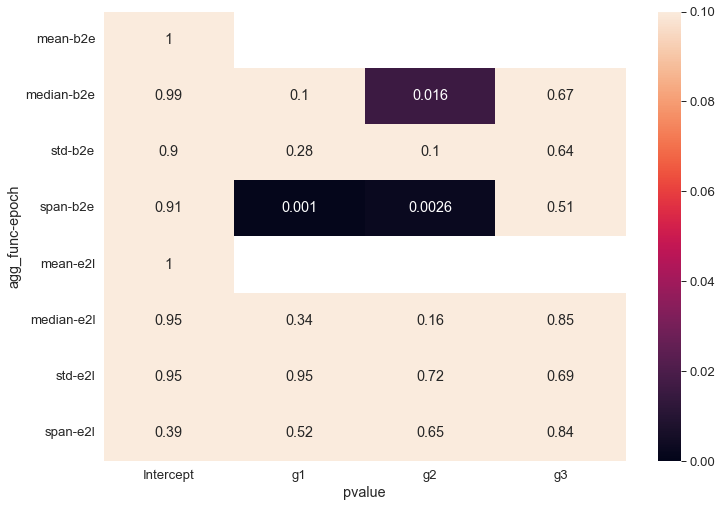

In [18]:
metric = 'RLScore'

def ols_pvalues(df):
    model = ols(f'{metric} ~ g1 + g2 + g3', data=df).fit()
    return pd.DataFrame(model.pvalues, columns=['pvalue'])

aggregations = ['mean', 'median', 'std', span]
aggregations_str = ['mean', 'median', 'std', 'span']

data = dfg.reorder_levels([1,0],axis=1).loc[:, pd.IndexSlice[['b2e', 'e2l']]]

data_agg = []
for agg_func in aggregations:
    data_agg.append(
        data.groupby(level='subject').apply(agg_func).stack('epoch').join(metrics)
    )
data_agg = pd.concat(data_agg, axis=0, keys=aggregations_str, names=['agg_func'])

data_coefs = data_agg.groupby(level=['epoch', 'agg_func']).apply(ols_pvalues)
data_coefs.index.names = ['epoch', 'agg_func', 'pvalue']
data_coefs = data_coefs.unstack('pvalue').reorder_levels([1,0], axis=0)

seaborn.heatmap(data_coefs['pvalue'], annot=True, vmin=0, vmax=0.1)
plt.savefig('g-pvalues.png')
plt.show()

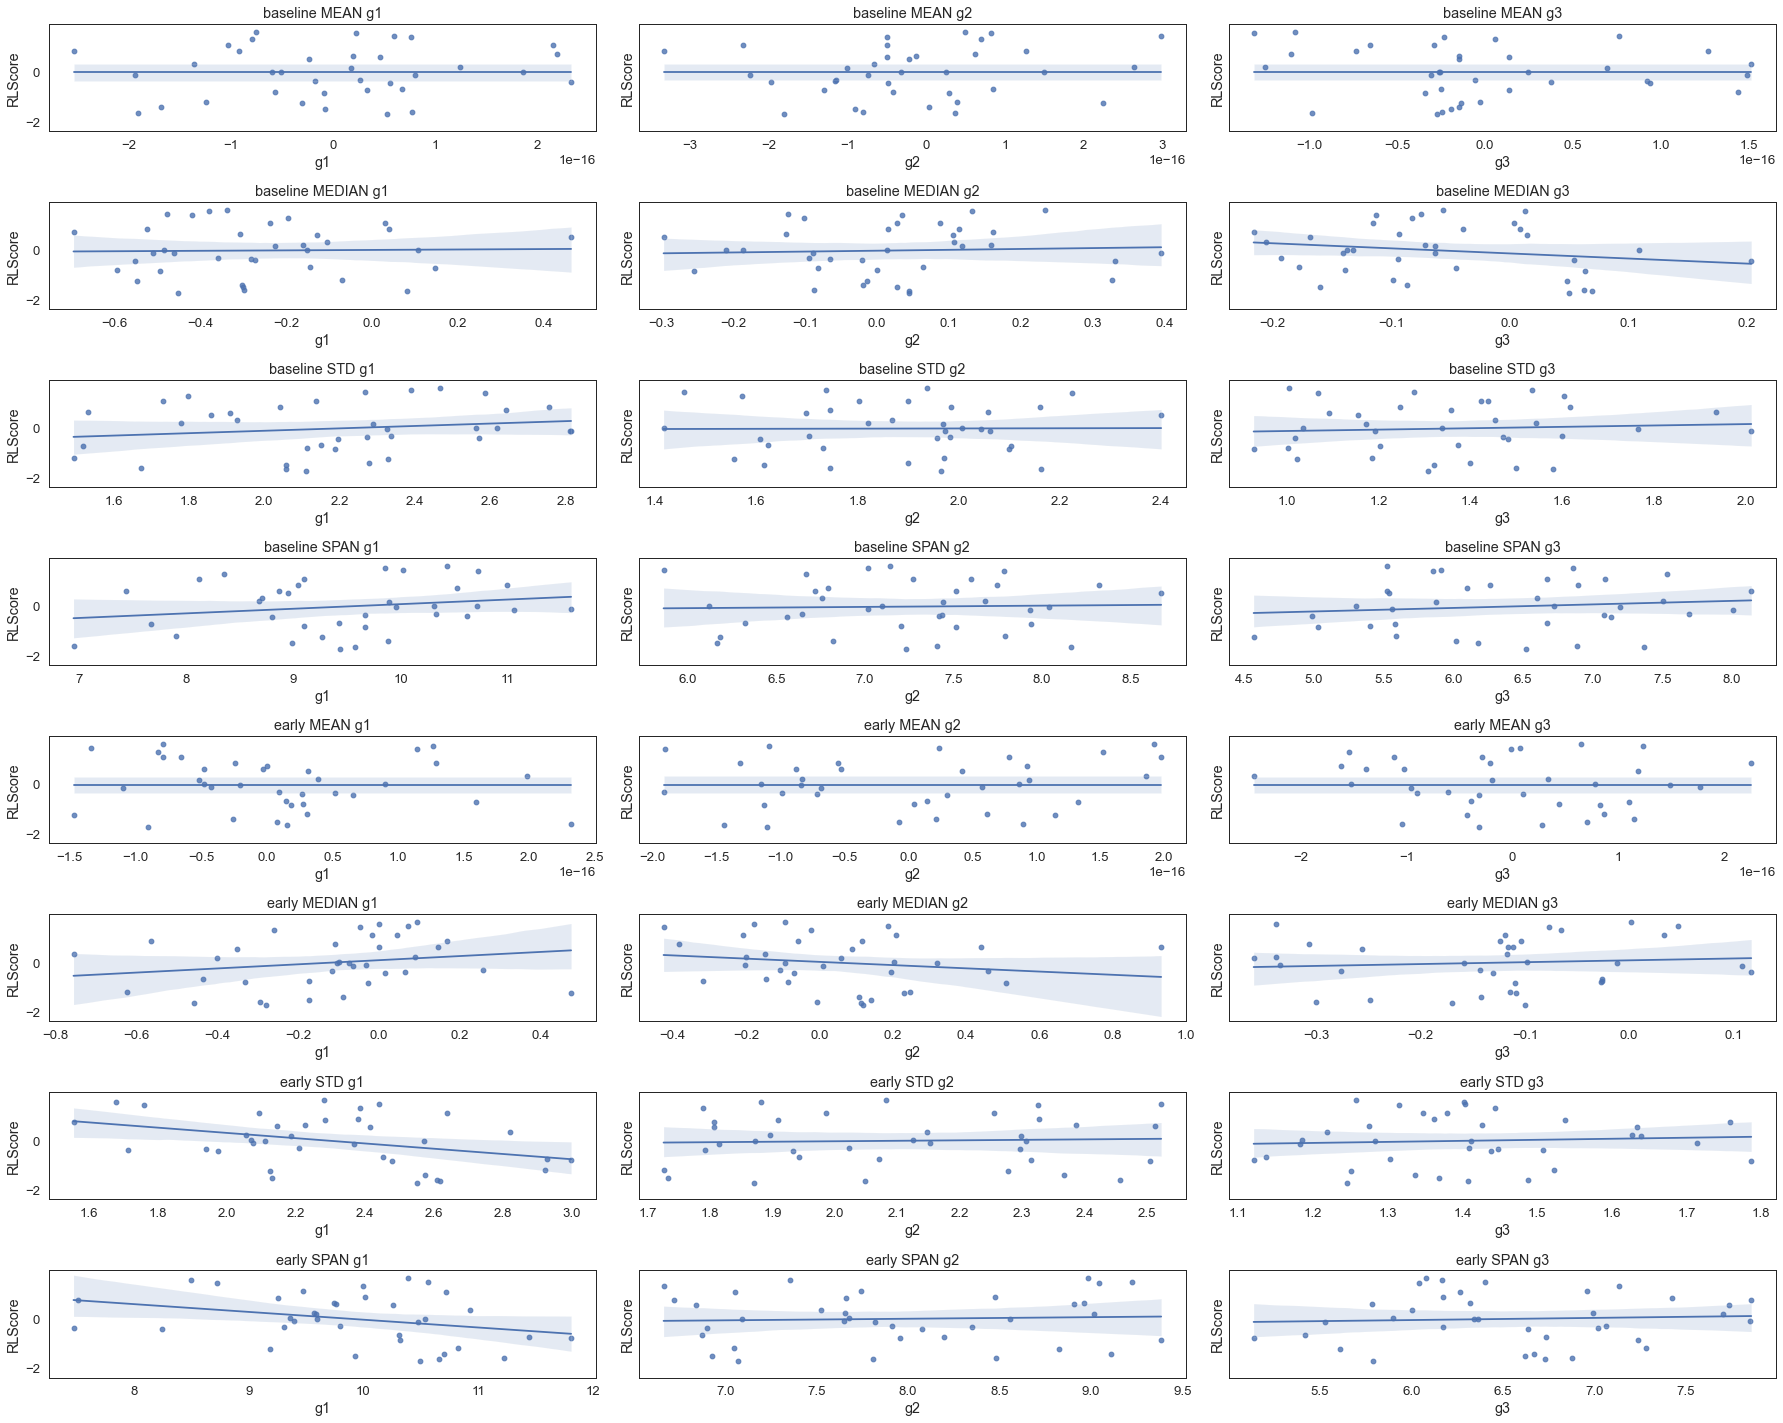

In [25]:
# correlation plot of each gradient with task score

fig, axes = plt.subplots(8,3, figsize=(25, 20), sharey=True)

for i, ax in enumerate(axes.flatten()):
    # epoch, agg_func
    epoch = 'baseline' if i < 12 else 'early'
    agg_func = 'mean' if i%12 < 3 else 'median' if i%12 < 6 else 'std' if i%12 < 9 else span
    agg_str = agg_func if agg_func != span else 'span'

    data = dfg.groupby(level='subject').apply(agg_func).xs(epoch, axis=1, level='epoch').join(metrics)

    g = 'g' + str(i%3 + 1)
    seaborn.regplot(x=g, y=metric, data=data, ax=ax)
    ax.set_title(epoch + ' ' + agg_str.upper() + ' ' + g)

plt.tight_layout()
# plt.savefig('g-regplot.svg')
plt.show()

In [60]:
from scipy.stats import pearsonr

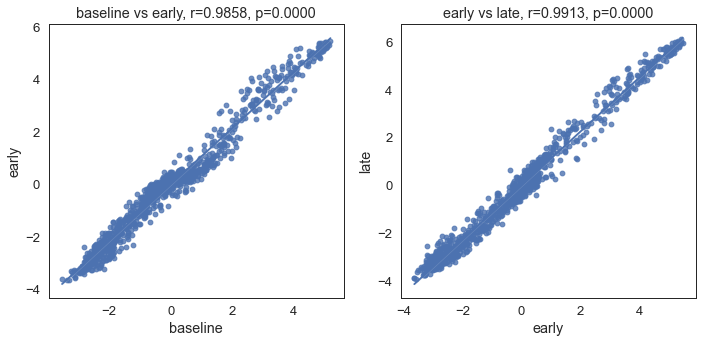

In [56]:
# mean over all subjects
data = dfg.groupby(level='region').mean()['g1']
fig, axes = plt.subplots(1,2, figsize=(10, 5))
seaborn.regplot(data=data, x='baseline', y='early', ax=axes[0])
r, p = pearsonr(data['baseline'], data['early'])
axes[0].set_title(f'baseline vs early, r={r:.4f}, p={p:.4f}')

seaborn.regplot(data=data, x='early', y='late', ax=axes[1])
r, p = pearsonr(data['early'], data['late'])
axes[1].set_title(f'early vs late, r={r:.4f}, p={p:.4f}')

plt.tight_layout()
plt.show()

In [71]:
def plot_b2e_e2l(subject, g):
    data = dfg.loc[subject, g]
    fig, axes = plt.subplots(1,2, figsize=(13, 7))
    seaborn.regplot(data=data, x='baseline', y='early', ax=axes[0])
    r, p = pearsonr(data['baseline'], data['early'])
    axes[0].set_title(f'baseline vs early, r={r:.4f}, p={p:.4f}')

    seaborn.regplot(data=data, x='early', y='late', ax=axes[1])
    r, p = pearsonr(data['early'], data['late'])
    axes[1].set_title(f'early vs late, r={r:.4f}, p={p:.4f}')

    fig.suptitle(f'subject {subject}, gradient {g[1:]}')
    plt.tight_layout()
    plt.show()

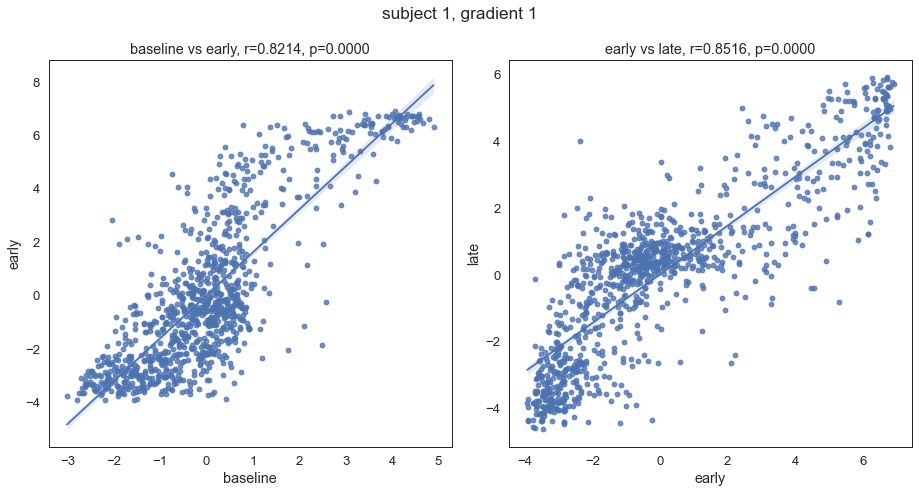

In [72]:
plot_b2e_e2l(1, 'g1')

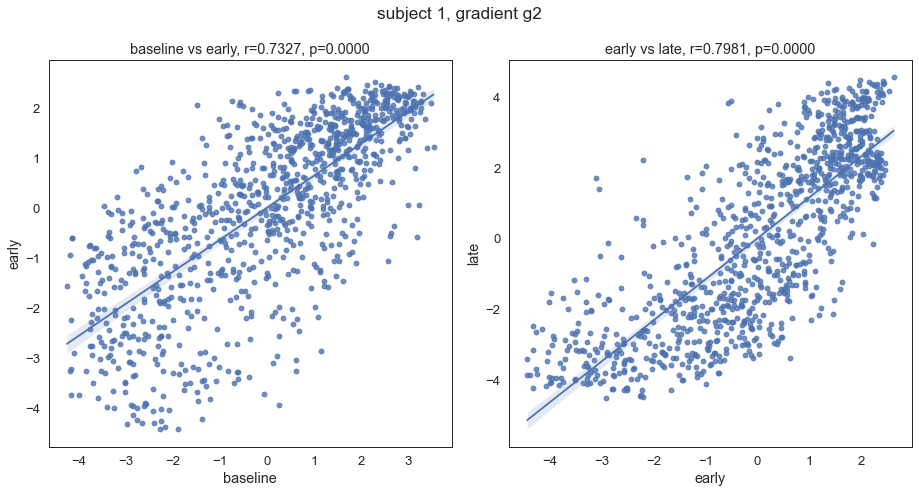

In [64]:
plot_b2e_e2l(1, 'g2')

In [ ]:
# span over baseline, early, late. THEN, apply agg funcs

In [127]:
df_agg = dfg.loc[:, pd.IndexSlice[:, ['baseline', 'early', 'late']]]
df_median = df_agg.groupby(level='subject').apply('median')
df_span = df_agg.groupby(level='subject').apply(span)
df_agg = pd.concat([df_span, df_median], axis=1,
               keys=['span', 'median'], names=['agg_func']
               ).reorder_levels(['g', 'epoch', 'agg_func'], axis=1)

In [128]:
df_agg

g                g1                              g2                      \
epoch      baseline      early       late  baseline     early      late   
agg_func       span       span       span      span      span      span   
subject                                                                   
1          7.902416  10.822998  10.523295  7.791563  7.049809  9.068239   
2          8.116284  10.724714  10.536885  7.598565  7.054360  8.058421   
3         10.330403   9.794302   9.139414  6.646628  7.912442  7.539186   
4          9.882214  10.703190  10.687422  6.819779  9.109152  7.050543   
6          9.040710  10.011309  10.376698  7.742290  8.476338  7.847421   
7         10.994748   9.257740   9.068767  8.320800  7.660154  7.247912   
8         10.724306   8.724813  10.891776  7.786132  9.042786  8.011493   
9          9.420082  10.308037  10.804054  6.325056  6.873091  7.525428   
10         9.670246   9.304628  11.501555  7.432154  8.348461  6.948367   
11        11.591516   9.391969   9.879073  7.017915  7.651533  6.211977   
12         7.671549  11.446413  11.905856  7.938692  8.196707  6.459369   
13         8.676062   9.569352  10.687237  7.677315  7.655448  7.028250   
14        10.022028  10.564492  10.046516  5.863589  9.225936  7.693324   
15         9.435079  10.493124  11.379641  7.230999  7.071016  8.212025   
16         9.261907   9.181779  11.401613  6.181434  8.824915  8.346186   
17         9.097640  11.811475   9.299928  7.202824  7.955361  7.247889   
18         9.669360  10.316844   9.695510  7.513271  9.382907  6.730991   
19         8.347576   9.995138  11.696033  6.667101  6.663466  7.755301   
20         9.886444   9.583219  11.209911  7.440048  9.013990  7.529713   
21         9.955175  10.540555  10.517325  8.038831  8.558342  8.726205   
23         8.794668   8.247466   9.999415  6.558132  8.074637  8.719538   
24        10.315746   9.358116  11.858942  7.098494  7.675058  7.052262   
26         6.943883  11.224833   9.775168  7.406199  8.482238  6.761633   
28         8.949379  10.259932  11.751389  8.671008  6.838388  7.558067   
29         8.867742   9.759035  11.358087  6.716847  8.908153  6.710487   
30         9.569945  10.662278   9.849267  8.164513  7.810601  5.962880   
31         7.438644   9.743045  12.095188  7.512150  8.963296  7.212416   
32         9.853096   8.499921   8.590210  7.017934  7.355548  6.360083   
33        10.526406   7.507067  12.185738  6.793039  6.718390  8.529008   
35         8.981172   9.923134  11.254315  6.166367  6.926120  9.065229   
38        10.622626   7.471655  12.294752  7.415876  6.901605  7.620736   
40         9.096324   9.472791  10.704131  7.269654  7.740428  7.089262   
41        10.714342   9.598817  10.222038  6.120076  7.094052  7.391473   
44         8.702900  10.934086  10.116829  6.759799  7.521141  8.749896   
45        10.434134  10.384873  10.860520  7.141983  8.982944  7.582444   
46        11.060199  10.479905  11.015032  7.931909  7.816938  7.642726   

g               g3                            g1                      \
epoch     baseline     early      late  baseline     early      late   
agg_func      span      span      span    median    median    median   
subject                                                                
1         5.590974  7.280610  5.202518 -0.070487 -0.623277  0.272395   
2         6.671138  6.266436  6.420477  0.031135 -0.016487 -0.614192   
3         7.693678  7.062267  5.391075 -0.357177  0.258380 -0.138163   
4         6.018525  6.670931  5.999523 -0.301965 -0.089058 -0.195421   
6         6.891414  6.173842  6.157413  0.038878 -0.563968 -0.136234   
7         6.265837  7.421277  5.205112 -0.522160  0.169879 -0.314052   
8         5.850430  6.039900  6.493862 -0.417663 -0.046638 -0.733337   
9         6.669136  5.417225  6.539567 -0.143539 -0.434081 -0.332347   
10        7.078910  6.171551  5.769596 -0.281523 -0.115464 -0.085980   
11        5.561798  7.849760  6.604028 -0.459987 -0.030465 -0.2

In [ ]:
# calc span -> b2e and e2l

In [ ]:
data = df_agg.stack(['g', 'agg_func'])
data['b2e'] = data['early'] - data['baseline']
data['e2l'] = data['late'] - data['early']
data = data.unstack(['g', 'agg_func'])

df_agg = data

In [270]:
df_agg

epoch     baseline                                                     \
g               g1                   g2                  g3             
agg_func    median       span    median      span    median      span   
subject                                                                 
1        -0.070487   7.902416  0.327176  7.791563 -0.098884  5.590974   
2         0.031135   8.116284  0.087285  7.598565 -0.115862  6.671138   
3        -0.357177  10.330403 -0.093767  6.646628 -0.192965  7.693678   
4        -0.301965   9.882214 -0.018690  6.819779 -0.086647  6.018525   
6         0.038878   9.040710  0.015002  7.742290  0.008197  6.891414   
7        -0.522160  10.994748  0.114551  8.320800 -0.039613  6.265837   
8        -0.417663  10.724306  0.034571  7.786132 -0.112772  5.850430   
9        -0.143539   9.420082  0.064909  6.325056 -0.178245  6.669136   
10       -0.281523   9.670246 -0.065567  7.432154 -0.094289  7.078910   
11       -0.459987  11.591516 -0.088751  7.017915 -0.140816  5.561798   
12        0.146755   7.671549 -0.082209  7.938692 -0.045448  5.581013   
13       -0.159795   8.676062  0.159195  7.677315 -0.071906  7.502161   
14       -0.476795  10.022028 -0.124006  5.863589 -0.074917  5.908791   
15       -0.450609   9.435079  0.044699  7.230999  0.049884  6.517478   
16       -0.547304   9.261907 -0.014012  6.181434  0.048248  4.567293   
17       -0.593041   9.097640  0.000651  7.202824 -0.138706  5.400968   
18       -0.492928   9.669360 -0.254490  7.513271  0.063444  5.028560   
19       -0.196284   8.347576 -0.101700  6.667101 -0.082796  7.530577   
20       -0.225531   9.886444  0.117981  7.440048 -0.062797  5.878481   
21        0.108033   9.955175 -0.209409  8.038831 -0.132033  7.196616   
23       -0.550070   8.794668  0.331890  6.558132  0.203462  7.130907   
24       -0.151579  10.315746 -0.185856  7.098494 -0.137574  6.723895   
26       -0.297835   6.943883 -0.086877  7.406199  0.062877  6.884528   
28        0.463326   8.949379 -0.296523  8.671008 -0.168409  5.534692   
29       -0.128806   8.867742  0.106550  6.716847  0.014400  5.523594   
30        0.080763   9.569945  0.044976  8.164513  0.069201  7.368626   
31       -0.306830   7.438644 -0.125595  7.512150 -0.093829  8.136664   
32       -0.378933   9.853096  0.132164  7.017934  0.012666  6.854672   
33       -0.694056  10.526406  0.161780  6.793039 -0.216095  6.098320   
35       -0.300042   8.981172  0.028355  6.166367 -0.160503  6.173587   
38       -0.271112  10.622626 -0.020938  7.415876  0.054022  4.989249   
40       -0.235879   9.096324  0.028155  7.269654  0.003853  7.084466   
41       -0.483962  10.714342  0.014404  6.120076  0.108893  5.301506   
44       -0.104505   8.702900  0.107641  6.759799 -0.205263  6.598623   
45       -0.336813  10.434134  0.234126  7.141983 -0.056161  5.527151   
46       -0.508733  11.060199  0.395429  7.931909 -0.063586  8.004940   

epoch        early                                 ...       b2e            \
g               g1                   g2            ...        g2             
agg_func    median       span    median      span  ...    median      span   
subject                                            ...                       
1        -0.623277  10.822998  0.246389  7.049809  ... -0.080786 -0.741754   
2        -0.016487  10.724714 -0.208158  7.054360  ... -0.295443 -0.544205   
3         0.258380   9.794302 -0.108823  7.912442  ... -0.015056  1.265814   
4        -0.089058  10.703190  0.108136  9.109152  ...  0.126826  2.289373   
6        -0.563968  10.011309 -0.057551  8.476338  ... -0.072553  0.734049   
7         0.169879   9.257740  0.115212  7.660154  ...  0.000661 -0.660646   
8        -0.046638   8.724813 -0.425378  9.042786  ... -0.459949  1.256653   
9        -0.434081  10.308037 -0.146288  6.873091  ... -0.211197  0.548034   
10       -0.115464   9.304628  0.460589  8.348461  ...  0.526156  0.916306   
11       -0.030465   9.391969 -0.203722  7.651533  ... -0.114970 

In [85]:
def ratio(data, epoch1, epoch2):
    # N = num of regions ~ 1000 => p value is small
    rvalue, pvalue = pearsonr(data[epoch1], data[epoch2])
    return rvalue

In [89]:
ratio(dfg.loc[1, 'g1'], 'baseline', 'early')

0.821432034406216

In [118]:
df_b2e = dfg.stack('g').groupby(level=['subject', 'g']).apply(ratio, 'baseline', 'early').unstack('g')
df_e2l = dfg.stack('g').groupby(level=['subject', 'g']).apply(ratio, 'early', 'late').unstack('g')

# add a level to index columns
df_ratio = pd.concat([df_b2e, df_e2l], axis=1,
               names=['agg_func', 'epoch'], keys=[('ratio', 'b2e'), ('ratio', 'e2l')]
               ).reorder_levels(['g', 'epoch', 'agg_func'], axis=1)

In [119]:
df_ratio

g,g1,g2,g3,g1,g2,g3
epoch,b2e,b2e,b2e,e2l,e2l,e2l
agg_func,ratio,ratio,ratio,ratio,ratio,ratio
subject,,,,,,
1,0.821432,0.732690,0.746347,0.851640,0.798133,0.725377
2,0.800975,0.739972,0.771520,0.878937,0.794524,0.630992
3,0.832658,0.808845,0.732214,0.844850,0.822398,0.788165
4,0.855700,0.844308,0.738474,0.863540,0.803117,0.744064
6,0.769901,0.749098,0.697797,0.854753,0.838751,0.756347
7,0.844968,0.763334,0.651823,0.815572,0.826390,0.720107
8,0.866302,0.818831,0.734798,0.819470,0.731460,0.603276


In [272]:
df_ratio.columns

MultiIndex([('g1', 'b2e', 'ratio'),
            ('g2', 'b2e', 'ratio'),
            ('g3', 'b2e', 'ratio'),
            ('g1', 'e2l', 'ratio'),
            ('g2', 'e2l', 'ratio'),
            ('g3', 'e2l', 'ratio')],
           names=['g', 'epoch', 'agg_func'])

In [273]:
df_agg.columns

MultiIndex([('baseline', 'g1', 'median'),
            ('baseline', 'g1',   'span'),
            ('baseline', 'g2', 'median'),
            ('baseline', 'g2',   'span'),
            ('baseline', 'g3', 'median'),
            ('baseline', 'g3',   'span'),
            (   'early', 'g1', 'median'),
            (   'early', 'g1',   'span'),
            (   'early', 'g2', 'median'),
            (   'early', 'g2',   'span'),
            (   'early', 'g3', 'median'),
            (   'early', 'g3',   'span'),
            (    'late', 'g1', 'median'),
            (    'late', 'g1',   'span'),
            (    'late', 'g2', 'median'),
            (    'late', 'g2',   'span'),
            (    'late', 'g3', 'median'),
            (    'late', 'g3',   'span'),
            (     'b2e', 'g1', 'median'),
            (     'b2e', 'g1',   'span'),
            (     'b2e', 'g2', 'median'),
            (     'b2e', 'g2',   'span'),
            (     'b2e', 'g3', 'median'),
            (     'b2e', 'g3',   '

In [274]:
df = pd.concat([df_agg.reorder_levels(['g', 'epoch', 'agg_func'], axis=1),
                df_ratio], axis=1)

In [275]:
df

g               g1                   g2                  g3            \
epoch     baseline             baseline            baseline             
agg_func    median       span    median      span    median      span   
subject                                                                 
1        -0.070487   7.902416  0.327176  7.791563 -0.098884  5.590974   
2         0.031135   8.116284  0.087285  7.598565 -0.115862  6.671138   
3        -0.357177  10.330403 -0.093767  6.646628 -0.192965  7.693678   
4        -0.301965   9.882214 -0.018690  6.819779 -0.086647  6.018525   
6         0.038878   9.040710  0.015002  7.742290  0.008197  6.891414   
7        -0.522160  10.994748  0.114551  8.320800 -0.039613  6.265837   
8        -0.417663  10.724306  0.034571  7.786132 -0.112772  5.850430   
9        -0.143539   9.420082  0.064909  6.325056 -0.178245  6.669136   
10       -0.281523   9.670246 -0.065567  7.432154 -0.094289  7.078910   
11       -0.459987  11.591516 -0.088751  7.017915 -0.140816  5.561798   
12        0.146755   7.671549 -0.082209  7.938692 -0.045448  5.581013   
13       -0.159795   8.676062  0.159195  7.677315 -0.071906  7.502161   
14       -0.476795  10.022028 -0.124006  5.863589 -0.074917  5.908791   
15       -0.450609   9.435079  0.044699  7.230999  0.049884  6.517478   
16       -0.547304   9.261907 -0.014012  6.181434  0.048248  4.567293   
17       -0.593041   9.097640  0.000651  7.202824 -0.138706  5.400968   
18       -0.492928   9.669360 -0.254490  7.513271  0.063444  5.028560   
19       -0.196284   8.347576 -0.101700  6.667101 -0.082796  7.530577   
20       -0.225531   9.886444  0.117981  7.440048 -0.062797  5.878481   
21        0.108033   9.955175 -0.209409  8.038831 -0.132033  7.196616   
23       -0.550070   8.794668  0.331890  6.558132  0.203462  7.130907   
24       -0.151579  10.315746 -0.185856  7.098494 -0.137574  6.723895   
26       -0.297835   6.943883 -0.086877  7.406199  0.062877  6.884528   
28        0.463326   8.949379 -0.296523  8.671008 -0.168409  5.534692   
29       -0.128806   8.867742  0.106550  6.716847  0.014400  5.523594   
30        0.080763   9.569945  0.044976  8.164513  0.069201  7.368626   
31       -0.306830   7.438644 -0.125595  7.512150 -0.093829  8.136664   
32       -0.378933   9.853096  0.132164  7.017934  0.012666  6.854672   
33       -0.694056  10.526406  0.161780  6.793039 -0.216095  6.098320   
35       -0.300042   8.981172  0.028355  6.166367 -0.160503  6.173587   
38       -0.271112  10.622626 -0.020938  7.415876  0.054022  4.989249   
40       -0.235879   9.096324  0.028155  7.269654  0.003853  7.084466   
41       -0.483962  10.714342  0.014404  6.120076  0.108893  5.301506   
44       -0.104505   8.702900  0.107641  6.759799 -0.205263  6.598623   
45       -0.336813  10.434134  0.234126  7.141983 -0.056161  5.527151   
46       -0.508733  11.060199  0.395429  7.931909 -0.063586  8.004940   

g               g1                   g2            ...                      \
epoch        early                early            ...       e2l             
agg_func    median       span    median      span  ...    median      span   
subject                                            ...                       
1        -0.623277  10.822998  0.246389  7.049809  ... -0.189107  2.018430   
2        -0.016487  10.724714 -0.208158  7.054360  ...  0.275036  1.004061   
3         0.258380   9.794302 -0.108823  7.912442  ...  0.165835 -0.373256   
4        -0.089058  10.703190  0.108136  9.109152  ... -0.171550 -2.058609   
6        -0.563968  10.011309 -0.057551  8.476338  ...  0.030359 -0.628918   
7         0.169879   9.257740  0.115212  7.660154  ... -0.094955 -0.412242   
8        -0.046638   8.724813 -0.425378  9.042786  ...  0.594312 -1.031292   
9        -0.434081  10.308037 -0.146288  6.873091  ...  0.263077  0.652337   
10       -0.115464   9.304628  0.460589  8.348461  ... -0.637743 -1.400094   
11       -0.030465   9.391969 -0.203722  7.651533  ... -0.000545 

In [276]:
metric = 'RLScore'

def plot_agg_func(agg_func, save=False):
    data = df.xs(agg_func, axis=1, level='agg_func')
    epochs = data.columns.get_level_values('epoch').unique()

    fig, axes = plt.subplots(len(epochs), 3, figsize=(15, 4*len(epochs)))
    for i, epoch in enumerate(epochs):
        for g in ['g1', 'g2', 'g3']:

            seaborn.regplot(x=data.xs(g, axis=1, level='g')[epoch],
                            y=metrics[metric], ax=axes[i, int(g[1:])-1])
            r, p = pearsonr(data.xs(g, axis=1, level='g')[epoch],
                                  metrics[metric])
            axes[i, int(g[1:])-1].set_title(f'{epoch} {agg_func.upper()} {g} -- r={r:.2f}, p={p:.2f}')
    plt.tight_layout()
    if save:    plt.savefig(f'scatter-{agg_func}.svg')
    plt.show()

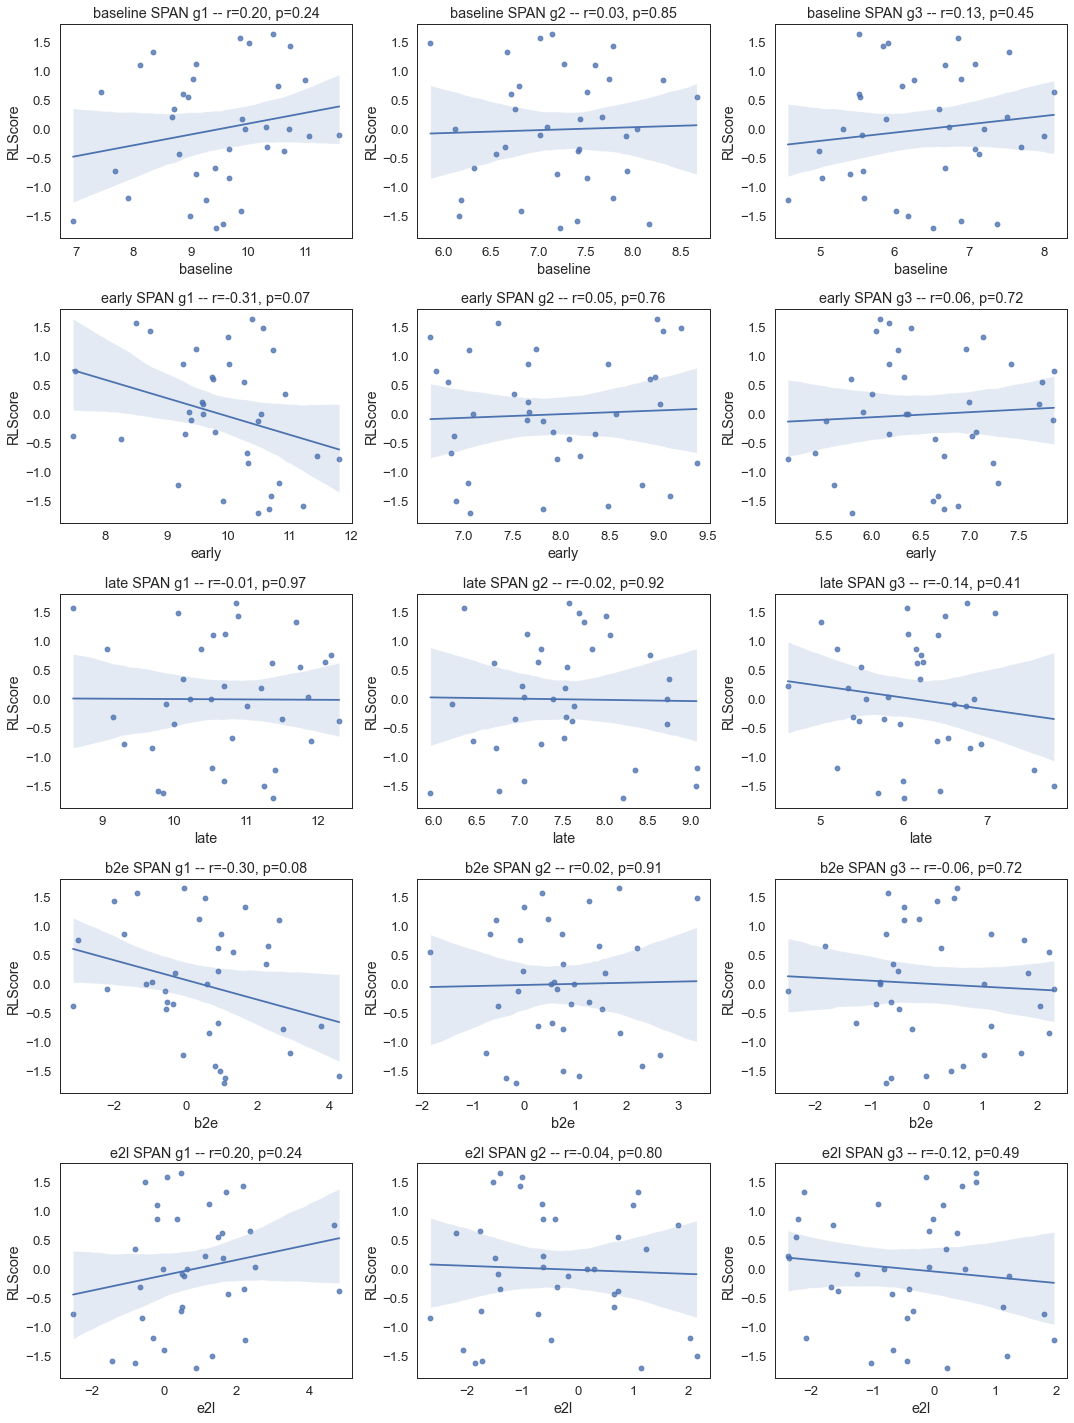

In [277]:
plot_agg_func('span', save=True)

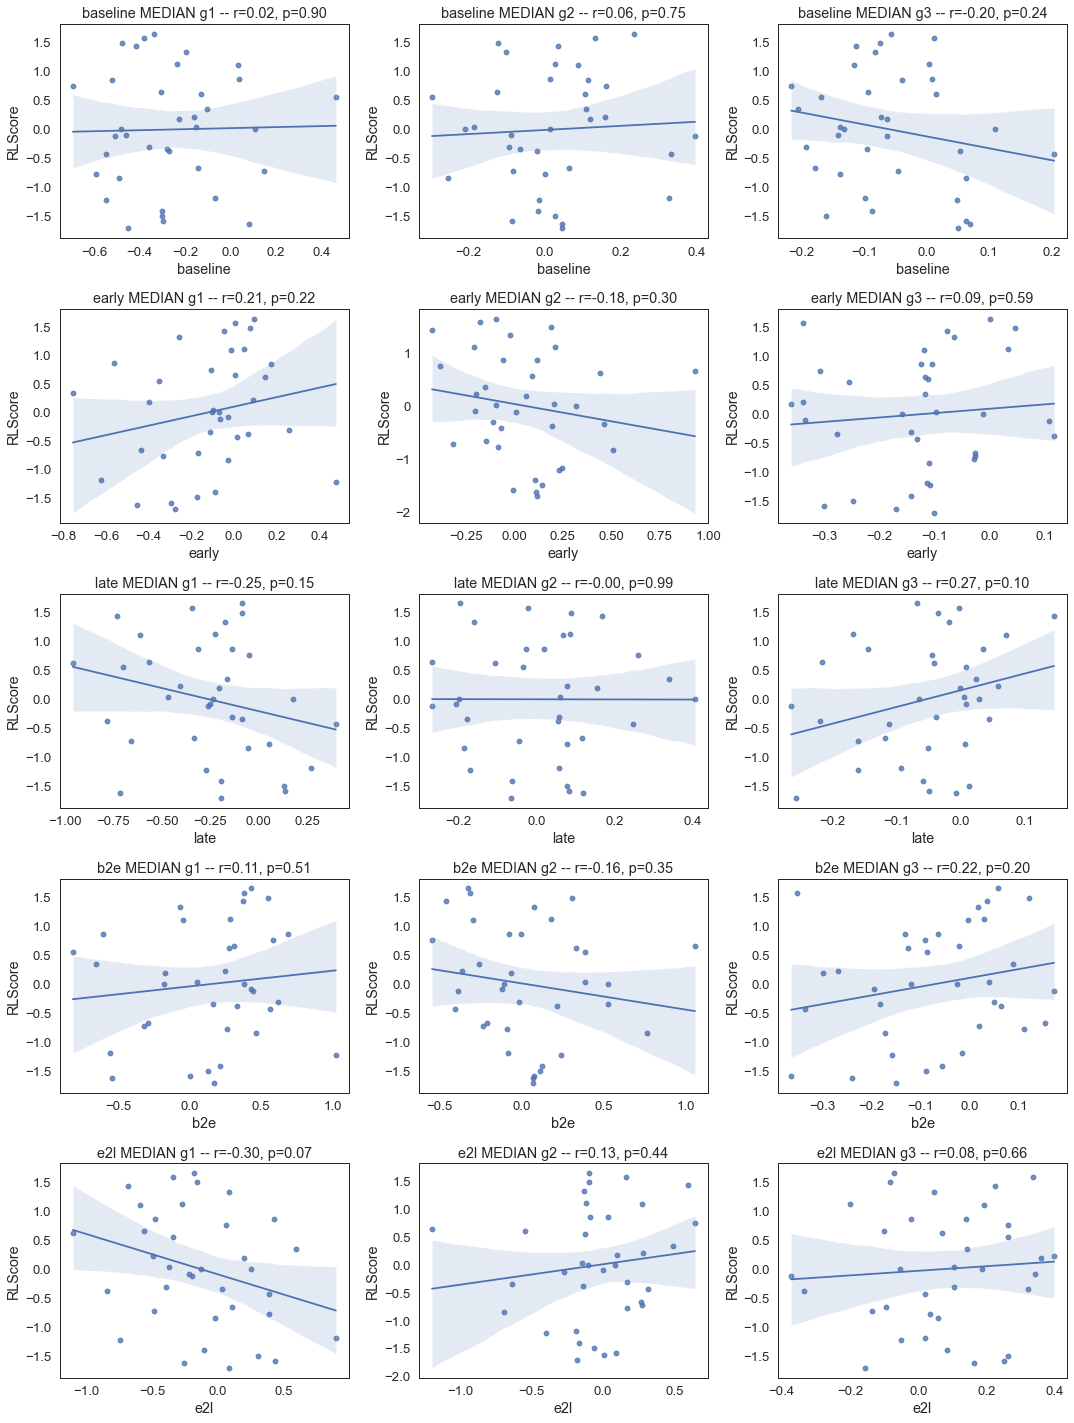

In [278]:
plot_agg_func('median', save=True)

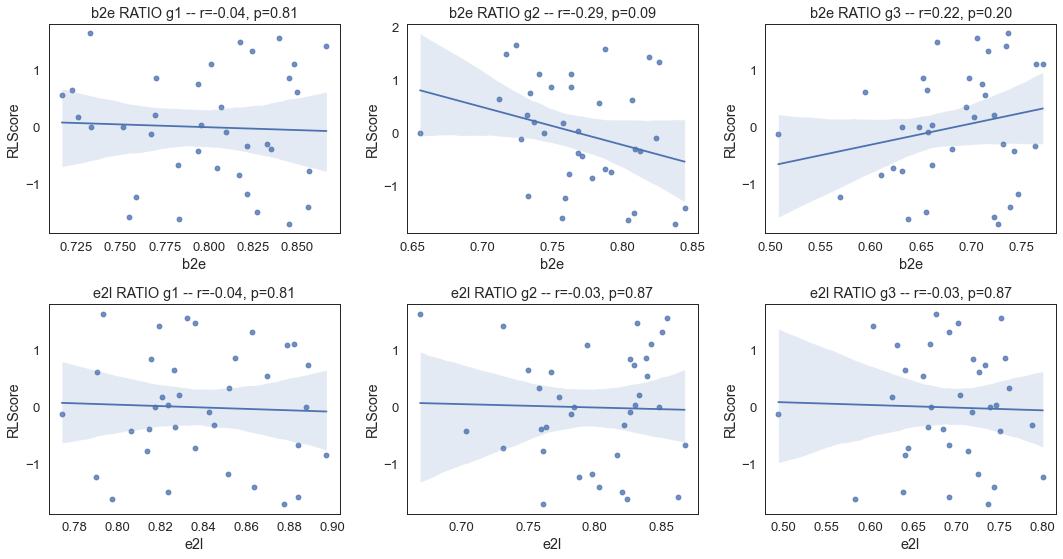

In [279]:
plot_agg_func('ratio', save=True)

## separate plots
 for significant ones saved in svg

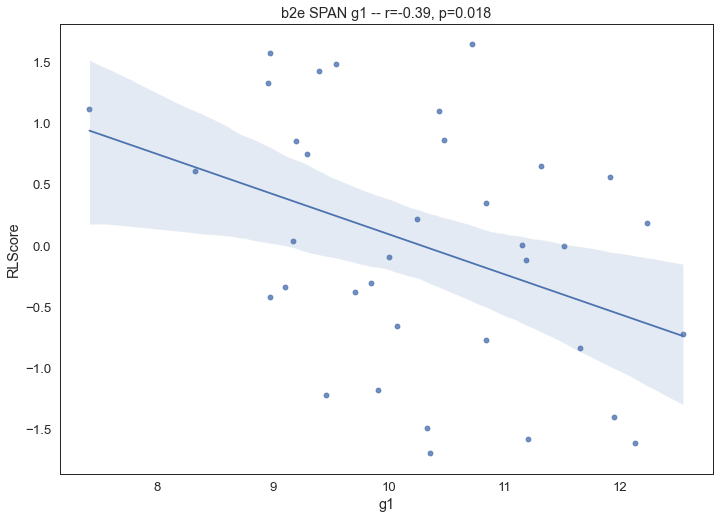

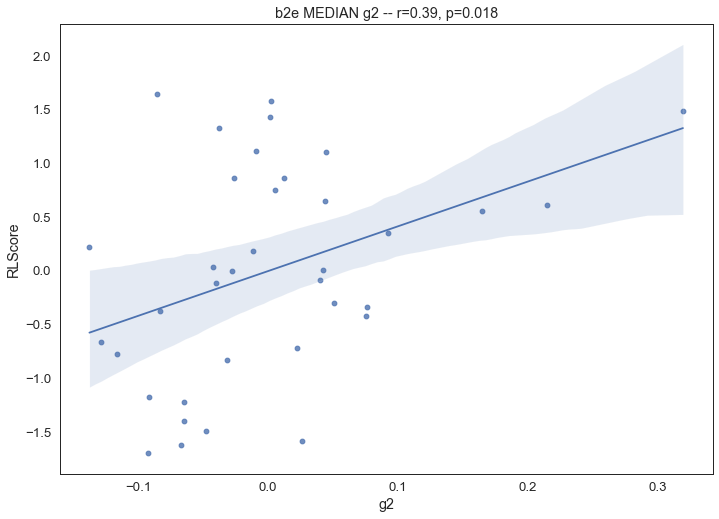

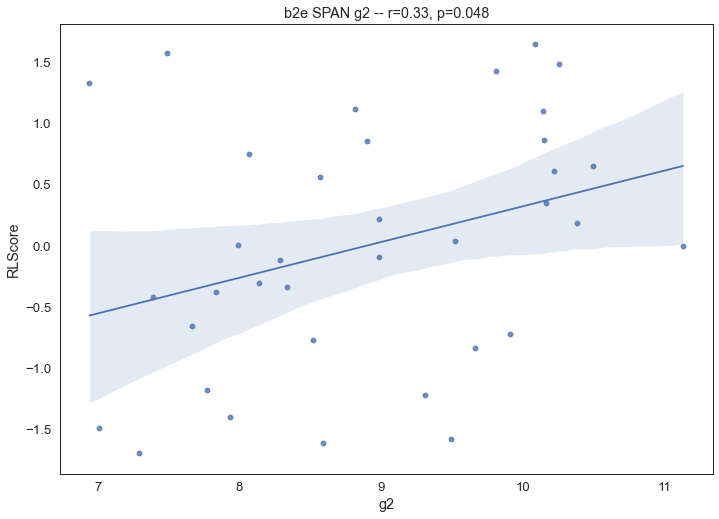

In [20]:
from scipy import stats

for g, agg_func, epoch in [('g1', span,     'b2e'),
                           ('g2', 'median', 'b2e'),
                           ('g2', span,     'b2e'),
                           ]:

    agg_str = agg_func if agg_func != span else 'span'

    data = dfg.groupby(level='subject').apply(agg_func).xs(epoch, axis=1, level='epoch').join(metrics)

    seaborn.regplot(x=g, y=metric, data=data)
    # add correlation coefficient and p value
    r, p = stats.pearsonr(data[g], data[metric])
    plt.title(f'{epoch} {agg_str.upper()} {g} -- r={r:.2f}, p={p:.3f}')

    plt.savefig(f'scatter-{g}-{epoch}-{agg_str}.svg')
    plt.show()

## details
 of the regression for 'RLScore' metric, 'median' / 'span' funcs and 'b2e' / 'e2l' epochs

In [ ]:
print('metric:', metric)
for agg_func in  ['median', span]:
    agg_str = agg_func if agg_func != span else 'span'
    for epoch in ['b2e', 'e2l']:
        data = dfg.groupby(level='subject').apply(agg_func).xs(epoch, axis=1, level='epoch').join(metrics)
        model = ols(f'{metric} ~ g1 + g2 + g3', data=data).fit()

        print('for epoch:', epoch, 'agg_func:', agg_str, '\n')
        print(model.summary())
        print('\n\n\n')

In [22]:
# metric: RLScore
# for epoch: b2e agg_func: median
#
#                             OLS Regression Results
# ==============================================================================
# Dep. Variable:                RLScore   R-squared:                       0.223
# Model:                            OLS   Adj. R-squared:                  0.150
# Method:                 Least Squares   F-statistic:                     3.065
# Date:                Fri, 31 Mar 2023   Prob (F-statistic):             0.0420
# Time:                        15:05:15   Log-Likelihood:                -46.029
# No. Observations:                  36   AIC:                             100.1
# Df Residuals:                      32   BIC:                             106.4
# Df Model:                           3
# Covariance Type:            nonrobust
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# Intercept     -0.0011      0.156     -0.007      0.994      -0.320       0.317
# g1             1.4468      0.860      1.682      0.102      -0.306       3.199
# g2             4.2922      1.686      2.546      0.016       0.859       7.726
# g3             1.1039      2.557      0.432      0.669      -4.104       6.312
# ==============================================================================
# Omnibus:                        1.057   Durbin-Watson:                   1.960
# Prob(Omnibus):                  0.589   Jarque-Bera (JB):                1.025
# Skew:                           0.259   Prob(JB):                        0.599
# Kurtosis:                       2.356   Cond. No.                         16.8
# ==============================================================================
#
# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#
#
#
#
# for epoch: e2l agg_func: median
#
#                             OLS Regression Results
# ==============================================================================
# Dep. Variable:                RLScore   R-squared:                       0.106
# Model:                            OLS   Adj. R-squared:                  0.022
# Method:                 Least Squares   F-statistic:                     1.264
# Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.303
# Time:                        15:05:15   Log-Likelihood:                -48.559
# No. Observations:                  36   AIC:                             105.1
# Df Residuals:                      32   BIC:                             111.5
# Df Model:                           3
# Covariance Type:            nonrobust
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# Intercept     -0.0121      0.194     -0.062      0.951      -0.407       0.383
# g1            -0.9367      0.972     -0.964      0.342      -2.916       1.043
# g2             3.1245      2.173      1.438      0.160      -1.302       7.551
# g3             0.4343      2.275      0.191      0.850      -4.199       5.067
# ==============================================================================
# Omnibus:                        3.490   Durbin-Watson:                   1.970
# Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.555
# Skew:                          -0.025   Prob(JB):                        0.460
# Kurtosis:                       1.983   Cond. No.                         13.9
# ==============================================================================
#
# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#
#
#
#
# for epoch: b2e agg_func: span
#
#                             OLS Regression Results
# ==============================================================================
# Dep. Variable:                RLScore   R-squared:                       0.369
# Model:                            OLS   Adj. R-squared:                  0.310
# Method:                 Least Squares   F-statistic:                     6.230
# Date:                Fri, 31 Mar 2023   Prob (F-statistic):            0.00187
# Time:                        15:05:15   Log-Likelihood:                -42.294
# No. Observations:                  36   AIC:                             92.59
# Df Residuals:                      32   BIC:                             98.92
# Df Model:                           3
# Covariance Type:            nonrobust
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# Intercept      0.1826      1.694      0.108      0.915      -3.269       3.634
# g1            -0.4530      0.125     -3.613      0.001      -0.708      -0.198
# g2             0.4207      0.129      3.265      0.003       0.158       0.683
# g3             0.1057      0.158      0.671      0.507      -0.215       0.427
# ==============================================================================
# Omnibus:                        0.273   Durbin-Watson:                   1.837
# Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.368
# Skew:                           0.185   Prob(JB):                        0.832
# Kurtosis:                       2.671   Cond. No.                         188.
# ==============================================================================
#
# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
#
#
#
#
# for epoch: e2l agg_func: span
#
#                             OLS Regression Results
# ==============================================================================
# Dep. Variable:                RLScore   R-squared:                       0.030
# Model:                            OLS   Adj. R-squared:                 -0.061
# Method:                 Least Squares   F-statistic:                    0.3254
# Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.807
# Time:                        15:05:15   Log-Likelihood:                -50.034
# No. Observations:                  36   AIC:                             108.1
# Df Residuals:                      32   BIC:                             114.4
# Df Model:                           3
# Covariance Type:            nonrobust
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# Intercept      1.7156      1.989      0.863      0.395      -2.335       5.767
# g1            -0.0750      0.116     -0.649      0.521      -0.310       0.160
# g2            -0.0812      0.176     -0.462      0.647      -0.439       0.277
# g3            -0.0340      0.165     -0.207      0.837      -0.369       0.301
# ==============================================================================
# Omnibus:                        2.075   Durbin-Watson:                   2.105
# Prob(Omnibus):                  0.354   Jarque-Bera (JB):                1.251
# Skew:                          -0.115   Prob(JB):                        0.535
# Kurtosis:                       2.116   Cond. No.                         178.
# ==============================================================================
#
# Notes:
# [1] Standard Errors assume that the covariance matrix of the errors is correctly specified.